# Стартовый импорт библиотек

In [329]:
import time

In [330]:
start_time = time.time()  #Переменная для подсчёта времени работы программы

In [331]:
#Импорт задействованных библиотек(технические)
import numpy as np
import pandas as pd
import csv
#Библиотеки для анализа различных статистических показателей
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import scipy.stats as stats

In [332]:
#Задаём стиль графиков
matplotlib.style.use('ggplot')

# Подготовка данных для анализа

In [333]:
#Подсчёт общего числа рабочих дней в компаниях
ticker_names = ['BSPB','CBOM', 'QIWIDR', 'RENI', 'SBER', 'SBER_p', 'SFIN', 'TCSGDR', 'VTBR', 'MOEX'] 
all_days_amount = pd.DataFrame() 
all_days_amount['Ticker']  =  ticker_names
years = [i for i in range(2016, 2022)]
for i in years:
    work_days_amount = []
    for cur_ticker in ticker_names:
        file = pd.read_csv(cur_ticker + '.csv', sep = ';')
        dlit = (file['Дата'] % 10000 >= i)&(file['Дата'] % 10000 < (i+1))
        amount = len(file[dlit])
        work_days_amount.append(amount)
    all_days_amount[str(i)] = work_days_amount
    
all_days_amount.to_csv('Общее количество торговых дней в году для всех компаний.csv', sep = ';')
all_days_amount

,Ticker,2016,2017,2018,2019,2020,2021
0,BSPB,252,252,255,252,250,255
1,CBOM,252,252,255,252,250,255
2,QIWIDR,252,252,254,252,250,255
3,RENI,0,0,0,0,0,48
4,SBER,252,252,254,252,250,255
5,SBER_p,252,252,254,252,250,255
6,SFIN,243,252,254,252,250,255
7,TCSGDR,0,0,0,44,250,255
8,VTBR,252,252,254,252,250,255
9,MOEX,252,252,254,252,250,255


In [334]:
#Подсчёт общего числа рабочих дней в компаниях, у которых сохраняется стабильное число рабочих дней за весь период измерения
ticker_names = ['BSPB', 'CBOM', 'QIWIDR', 'SBER', 'SBER_p', 'SFIN', 'VTBR', 'MOEX']
all_days_amount = pd.DataFrame() 
all_days_amount['Ticker']  =  ticker_names
years = [i for i in range(2016, 2022)]
for i in years:
    work_days_amount = []
    for cur_ticker in ticker_names:
        file = pd.read_csv(cur_ticker + '.csv', sep = ';')
        dlit = (file['Дата'] % 10000 >= i)&(file['Дата'] % 10000 < (i+1))
        amount = len(file[dlit])
        work_days_amount.append(amount)
    all_days_amount[str(i)] = work_days_amount
    
all_days_amount.to_csv('Общее количество торговых дней в году для выбранных компаний.csv', sep = ';')
all_days_amount

,Ticker,2016,2017,2018,2019,2020,2021
0,BSPB,252,252,255,252,250,255
1,CBOM,252,252,255,252,250,255
2,QIWIDR,252,252,254,252,250,255
3,SBER,252,252,254,252,250,255
4,SBER_p,252,252,254,252,250,255
5,SFIN,243,252,254,252,250,255
6,VTBR,252,252,254,252,250,255
7,MOEX,252,252,254,252,250,255


In [335]:
#Подсчёт относительных скачков цен вниз
ticker_names = ['BSPB', 'CBOM', 'QIWIDR', 'SBER', 'SBER_p', 'SFIN', 'VTBR', 'MOEX']

years = [i for i in range(2016, 2022)]

lower_cost = pd.DataFrame() #Создаём Data Frame дял сохранения данных о котировках по годам
lower_cost['Тикер'] = ticker_names

for i in years:
    decreas_vol = []
    for cur_name in ticker_names:
        company_data = pd.read_csv(cur_name + '.csv', sep = ';')#Считываем данные котировки
        company_data['Delta'] = company_data['Цена'].pct_change().round(3)#Считаем разницу цены в соседние дни
        dlit = (company_data['Дата'] % 10000 >= i)&(company_data['Дата'] % 10000 < (i+1)) #ограничиваем данные только текущим годом
        cur_year = company_data[dlit]['Delta'].min()
        decreas_vol.append(cur_year)
    lower_cost[str(i)] = decreas_vol

lower_cost.to_csv('Относительные изменения цен вниз.csv', sep = ';', decimal=',')
lower_cost


,Тикер,2016,2017,2018,2019,2020,2021
0,BSPB,-0.046,-0.084,-0.077,-0.057,-0.127,-0.068
1,CBOM,-0.044,-0.025,-0.031,-0.040,-0.072,-0.028
2,QIWIDR,-0.093,-0.069,-0.130,-0.070,-0.212,-0.068
3,SBER,-0.062,-0.039,-0.170,-0.053,-0.096,-0.056
4,SBER_p,-0.053,-0.047,-0.134,-0.061,-0.092,-0.046
5,SFIN,-0.018,-0.079,-0.261,-0.077,-0.052,-0.035
6,VTBR,-0.039,-0.062,-0.090,-0.040,-0.144,-0.065
7,MOEX,-0.073,-0.056,-0.056,-0.058,-0.085,-0.046


In [336]:
#Подсчёт относительных скачков цен вверх
ticker_names = ['BSPB', 'CBOM', 'QIWIDR', 'SBER', 'SBER_p', 'SFIN', 'VTBR', 'MOEX']

years = [i for i in range(2016, 2022)]

upper_cost = pd.DataFrame() #Создаём Data Frame дял сохранения данных о котировках по годам
upper_cost['Тикер'] = ticker_names

for i in years:
    incr_vol = []
    for cur_name in ticker_names:
        company_data = pd.read_csv(cur_name + '.csv', sep = ';')#Считываем данные котировки
        company_data['Delta'] = company_data['Цена'].pct_change().round(3)#Считаем разницу цены в соседние дни
        dlit = (company_data['Дата'] % 10000 >= i)&(company_data['Дата'] % 10000 < (i+1)) #ограничиваем данные только текущим годом
        cur_year = company_data[dlit]['Delta'].max()
        incr_vol.append(cur_year)
    upper_cost[str(i)] = incr_vol

upper_cost.to_csv('Относительные изменения цен вниз.csv', sep = ';', decimal=',')
upper_cost


,Тикер,2016,2017,2018,2019,2020,2021
0,BSPB,0.072,0.060,0.087,0.052,0.056,0.060
1,CBOM,0.035,0.029,0.030,0.061,0.091,0.042
2,QIWIDR,0.094,0.094,0.103,0.242,0.110,0.100
3,SBER,0.064,0.063,0.080,0.030,0.129,0.057
4,SBER_p,0.055,0.071,0.076,0.028,0.084,0.053
5,SFIN,0.030,0.128,0.139,0.116,0.120,0.049
6,VTBR,0.090,0.080,0.058,0.101,0.086,0.072
7,MOEX,0.052,0.039,0.050,0.043,0.092,0.042


# Создание модели данных и проверка гипотезы на них

In [337]:
#Функция проверки критерия Колмогорова
def kolm_krit(n):
    data = np.random.normal(loc = 0, scale = 1, size = n) #Задаём параметры генерации нормального распределения
    result = stats.kstest(data,'norm')
    return data, round(result[1],3)

#Размер выборки - среднее число торговых дней в год
n = 252

KstestResult(statistic=0.05484159073843625, pvalue=0.41963114811849644)


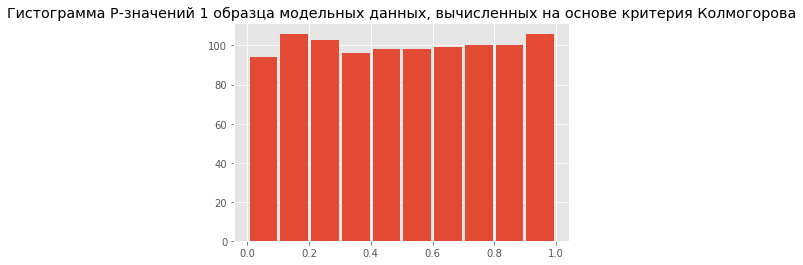

KstestResult(statistic=0.05733722721489448, pvalue=0.36498239642797903)


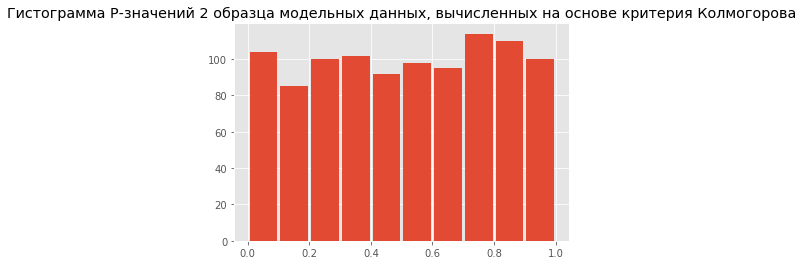

In [339]:
#построение гистограммы Р-значений, вычисленных с помощью критерия Колмогорова. (1 выборка)

P_values_1 = [] # Пустой массив для сохранения Р-значений выборки
tetst_data_1 = kolm_krit(n)[0] # Генерация данных на основании критерия Колмогорова
print(stats.kstest(tetst_data_1, 'norm'))

for i in range(10 ** 3):
    P_values_1.append(kolm_krit(n)[1])#Получаем Р-значения с помощью написанного модуля и сохраняем их в массив
    
#Отображение данных (из предыдущей ячейки) в формате гистограммы
plt.hist(P_values_1, rwidth = 0.9)
plt.title('Гистограмма Р-значений 1 образца модельных данных, вычисленных на основе критерия Колмогорова')
plt.show()
#построение гистограммы Р-значений, вычисленных с помощью критерия Колмогорова. (2 выборка)

P_values_2 = [] # Пустой массив для сохранения Р-значений выборки
tetst_data_2 = kolm_krit(n)[0] # Генерация данных на основании критерия Колмогорова
print(stats.kstest(tetst_data_2, 'norm'))

for i in range(10 ** 3):
    P_values_2.append(kolm_krit(n)[1])#Получаем Р-значения с помощью написанного модуля и сохраняем их в массив
    
#Отображение данных (из предыдущей ячейки) в формате гистограммы
plt.hist(P_values_2,rwidth = 0.9) #Создаём макет гистограммы и передаём ей данные и параметры оформления
plt.title('Гистограмма Р-значений 2 образца модельных данных, вычисленных на основе критерия Колмогорова') #Заголовок графика
plt.show()

In [353]:
# Проверим, имеют ли сгенерированных 2 набора данных общий вид 
compar1 = stats.ks_2samp(data_1, data_2) 
print(compar1[1])

0.8916529782426248


In [354]:
#Функция проверки критерия Фишера
def fisher_crit(var1, var2):
    return ((max(var1, var2))**2/(min(var1, var2))**2)

In [355]:
#Вычислим дисперсию 2 выборок данных
var_data_1 = np.var(data_1)
var_data_2 = np.var(data_2)
print("Дисперсия первой выборки = " + str(var_data_1), '\nДисперсия второй выборки = ' + str(var_data_2))

res_fisher = fisher_crit(var_data_1, var_data_2)
print("Критерий Фишера = ", res_fisher)

Дисперсия первой выборки = 0.9312889089253301 
Дисперсия второй выборки = 0.9166648458853652
Критерий Фишера =  1.0321616259272595


In [343]:
#Проверка мощности критерия
m = 10000 #количество экспериментов
res1 = []
res2 = []
for i in range(m):
    data_11 = (stats.t.rvs(df = 3, loc = 0, scale = 1,size = 252))
    data_12 = (stats.t.rvs(df = 3, loc = 0, scale = 1,size = 252))
    data_21 = (stats.lognorm.rvs(s = 1/4 ,loc = 0, scale = 1,size = 252))
    data_22 = (stats.lognorm.rvs(s = 1/4 ,loc = 0, scale = 1,size = 252))
    var_data_11 = np.var(data_11)
    var_data_12 = np.var(data_12)
    var_data_21 = np.var(data_21)
    var_data_22 = np.var(data_22)
    res1.append(fisher_crit(var_data_11, var_data_12))
    res2.append(fisher_crit(var_data_21, var_data_22))

pow1 = 0
pow2 = 0
## Вычисление мощности критерия
for i in res1:
    if i < 0.05:
        pow1 += 1
print(pow1 / m)

for i in res2:
    if i < 0.05:
        pow2 += 1
print(pow2 / m)


0.0
0.0


## Проверка гипотезы на подготовленных реальных данных фондового рынка

In [344]:
#импорт таблиц

def to_table(ticker): # Функция, выполняющая считывание файла(входной параметр ticker) и преобразование даты в Data Frame к нужному формату
    company = pd.read_csv(ticker + '.csv', sep = ';') #Открываем файл с котировками акции определённой компании 
    company['Дата'] = company['Дата'].astype('object')
    for i in range(len(company['Дата'])):
        company['Дата'][i] = str(company['Дата'][i])
        if len(company['Дата'][i]) < 8:
            company['Дата'][i] = '0' + company['Дата'][i] 
    company['Дата'] = pd.to_datetime(company['Дата'], format = '%d%m%Y') #преобразование даты
    return company

def logTransf(ticker, num):
    LD = []
    all_years = ['2016', '2017', '2018', '2019', '2020', '2021']
    company = to_table(ticker)
    company['Логарифм доходности'] = np.log(company['Цена'])
    
    all_days_table = pd.read_csv('Общее количество торговых дней в году для выбранных компаний.csv', sep=';')
    all_days_table = all_days_table.drop(columns = all_days_table.iloc[:, range(1)]) #Убираем лишний столбец с нумерацией

    for year in all_years:
        n = (all_days_table[str(year)][num]) #Количество дней в текущем проверяемом году
        
        first_index = company['Логарифм доходности'][company['Дата'] <= str(year)+'-12-31'].size - n #Находим индекс первого дня в году
        #Незабываем сохранить данные по текущему году, чтобы потом целиком скинуть всю инофрмацию по тикеру
        LD.append((company['Логарифм доходности'][company['Дата'] <= year + '-12-31'])[first_index:].kurtosis()) #вычисляем несмещённый эксцесс от выборки данных

    return LD


ticker_names = ['BSPB', 'CBOM', 'QIWIDR', 'SBER', 'SBER_p', 'SFIN', 'VTBR', 'MOEX']
PV = []
for cur_ticker in ticker_names:
    num = ticker_names.index(cur_ticker)
    log = logTransf(cur_ticker, num)
    

In [345]:
def calc_log_max(file, year = 0): 
    #Функция для расчёта логарифмической доходности. 
    # Параметры - название файла (file) и год, за который требуется посчитать доходность (year) 
    #при значении 0 считает за все годы

    company = pd.read_csv(file, sep=';') #считывание файла csv по определённому тикеру
    company['Дата'] = [int(str(company['Дата'][i])[4:]) for i in range(len(company['Дата']))] #из даты извлекается год
    
    #Далее через встроенную функцию логарифма, нормируем значения выборки, используя точность вычисления до сотых

    if year > 0: #Расчёт логарифмической доходности при заданном параметре год
        log_max_res = np.log(company['Цена'][company['Дата'] <= int(year)][company['Дата'] > int(year) - 1])
    else:
        log_max_res = np.log(company['Цена'])
    return [*stats.kstest(log_max_res, 'norm'), np.var(log_max_res)] #возвращаем 3 параметра под разные запросы программы


In [346]:
#Список всех рассматриваемых тикеров компаний
all_suitable_tickers = ['BSPB', 'CBOM', 'QIWIDR', 'SBER', 'SBER_p', 'SFIN', 'VTBR', 'MOEX', 'MOEXFN']

#Временной промежуток, на котором у нас есть данные: с 2016 по 2021
years = [i for i in range(2016,2022)]

#Создание дата фрейма для дальнейших вычислений
table_log_max = pd.DataFrame() 

#Столбец с наименованиями тикеров
table_log_max['Тикер'] = all_suitable_tickers

In [347]:
#Вычисляем, какой был наибольший скачок стоимостей акций при группировке по годам
all_data = [] #Те же данные в формате массива, чтобы их можно было показать на гистограмме
for year in years:
    log_cur_max = [] #Список для хранения значения по всем тикерам в течение одного года
    for ticker in all_suitable_tickers:
        #Добавление в список значение макс.логарифмических доходностей
        #Подсчёт идёт по каждому тикеру за все дни в течение одного года, после чего число записывается в ячейку памяти
        log_cur_max.append(round(calc_log_max(ticker+'.csv', year)[1], 10))
        all_data.append(round(log_cur_max[-1], 10))

    #После вычисления всех данных по тикерам в течение одного года (log_number_max)
    #Сохраняем в таблицу (table_log_max) все данные для общей статистики
    table_log_max[str(year)] = log_cur_max #группировка в данной таблице идёт по годам

#Заголовок перед таблицей с данными (выделяем жирным шрифтом)
print('\033[1m' + 'Таблица. Р-значения по критерию Колмогорова')

table_log_max

Таблица. Р-значения по критерию Колмогорова


,Тикер,2016,2017,2018,2019,2020,2021
0,BSPB,0.0,0.0,0.0,0.0,0.0,0.0
1,CBOM,0.0,0.0,0.0,0.0,0.0,0.0
2,QIWIDR,0.0,0.0,0.0,0.0,0.0,0.0
3,SBER,0.0,0.0,0.0,0.0,0.0,0.0
4,SBER_p,0.0,0.0,0.0,0.0,0.0,0.0
5,SFIN,0.0,0.0,0.0,0.0,0.0,0.0
6,VTBR,0.0,0.0,0.0,0.0,0.0,0.0
7,MOEX,0.0,0.0,0.0,0.0,0.0,0.0
8,MOEXFN,0.0,0.0,0.0,0.0,0.0,0.0


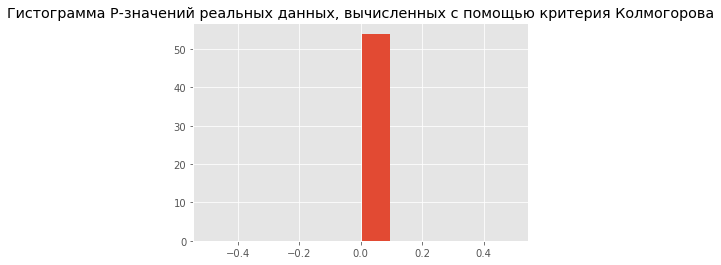

In [348]:
#Отображение данных (из предыдущей ячейки) в формате гистограммы
plt.hist(all_data,rwidth = 0.9) #Создаём макет гистограммы и передаём ей данные и параметры оформления
plt.title('Гистограмма Р-значений реальных данных, вычисленных с помощью критерия Колмогорова') #Заголовок графика
plt.show()

In [349]:
#Расчёт максимального скачка цены (по годам)
for year in years:
    log_cur_max = [] #Список для хранения значения по всем тикерам в течение одного года
    for ticker in all_suitable_tickers:
        #Добавление в список значение макс.логарифмических доходностей
        #Подсчёт идёт по каждому тикеру за все дни в течение одного года, после чего число записывается в ячейку памяти
        log_cur_max.append(round(calc_log_max(ticker + '.csv', year)[2], 10))

    #После вычисления всех данных по тикерам в течение одного года (log_number_max)
    #Сохраняем в таблицу (table_log_max) все данные для общей статистики
    table_log_max[str(year)] = log_cur_max

#Заголовок перед таблицей с данными (выделяем жирным шрифтом)
print('\033[1m' + 'Таблица. Дисперсии логарифмической доходности по годам')

table_log_max

Таблица. Дисперсии логарифмической доходности по годам


,Тикер,2016,2017,2018,2019,2020,2021
0,BSPB,0.017888,0.009437,0.006949,0.003200,0.015068,0.024605
1,CBOM,0.002226,0.000771,0.000937,0.001772,0.002109,0.001813
2,QIWIDR,0.014999,0.031903,0.007078,0.028793,0.035955,0.015811
3,SBER,0.033116,0.017967,0.016176,0.003656,0.015230,0.007723
4,SBER_p,0.035845,0.028103,0.012094,0.004961,0.012988,0.007813
5,SFIN,0.006580,0.002167,0.012295,0.004028,0.004777,0.003341
6,VTBR,0.001562,0.009853,0.020372,0.009122,0.015274,0.015281
7,MOEX,0.011590,0.005767,0.013191,0.003866,0.025829,0.003400
8,MOEXFN,0.008887,0.003512,0.009493,0.002571,0.019172,0.014882


In [350]:
#Расчёт значений дисперсии по каждому тикеру за всё время
list_var = []

for ticker in all_suitable_tickers:
    #Добавление в список значение макс.логарифмических доходностей
    #Подсчёт идёт по каждому тикеру за все дни измеряемого промежутка, после чего число записывается в ячейку памяти
    list_var.append(round(calc_log_max(ticker + '.csv')[2], 10))

    #После вычисления всех данных по тикеру
    #Сохраняем в список (table_log_max) все данные для общей статистики

#Заголовок перед таблицей с данными (выделяем жирным шрифтом)
print('Таблица. Дисперсии логарифмической доходности\n')

for i in range(len(all_suitable_tickers)):
    print(all_suitable_tickers[i], ':', list_var[i]) #Выводим дисперсию вместе с названием тикера

Таблица. Дисперсии логарифмической доходности

BSPB : 0.0300476109
CBOM : 0.0327344571
QIWIDR : 0.0461093379
SBER : 0.0847239314
SBER_p : 0.1388361137
SFIN : 0.0387604303
VTBR : 0.0648307536
MOEX : 0.0456882284
MOEXFN : 0.0535686326


In [351]:
#Создаю Дата фрейм для сохранения значений критерия Фишера
result = pd.DataFrame()
result['Tiker'] = all_suitable_tickers[:-1]  #Переносим список всех тикеров кроме индекса MOEXFN(с ним всё сравниваем)
result["Fishre's criterion"] = all_suitable_tickers[:-1] #Столбец для значений критерия Фишера

for i in list_var[:-1]:
    y = fisher_crit(i, list_var[-1]) #По уже написанной функции считаем значение критерия
    result["Fishre's criterion"][list_var.index(i)] = y  #Сохраняем в строке соответствующего тикера

result.to_csv('Значения критерия Фишера для всех выбранных акций.csv', sep = ';')

print('\033[1m' + 'Таблица. Значения критерия Фишера')
result

Таблица. Значения критерия Фишера


,Tiker,Fishre's criterion
0,BSPB,3.17835
1,CBOM,2.678
2,QIWIDR,1.34972
3,SBER,2.50145
4,SBER_p,6.71713
5,SFIN,1.91005
6,VTBR,1.46467
7,MOEX,1.37471


In [352]:
finish_time = time.time()
#Общее время работы программы, включая все операции анализа, импорта библиотек и генерации данных
print("--- %s seconds ---" % (finish_time - start_time)) 

--- 10.82125997543335 seconds ---
